# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Necessary to clear data and merge values

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [283]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [284]:
#Code:
DFS = pd.read_csv("C:\\Users\\ericp\\OneDrive\\Documents\\GitHub\\project-1\\data\\sat_2017.csv")
DFA = pd.read_csv("C:\\Users\\ericp\\OneDrive\\Documents\\GitHub\\project-1\\data\\act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [285]:
#Code:
DFS.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [286]:
DFA.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4



#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  
* SAT 17 has states, participation rate, combined scores of reading and writing, and math
* ACT 17 has states, participation rate, English, Math, Reading (seperate), Science and Composite

#### 4a. Does the data look complete? 

In [287]:
DFS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [288]:
DFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: SAT does not include the national averages. But otherwise States and Territories are accounted for with no non-null values. However there are some columns which should be cleaned and passed as numeric

Answer: Looks like 'Composite' column for ACT needs to be cleaned. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [289]:
for x in DFA['Composite']:
    try:
        x = float(x)
    except: 
        print(x)


20.2x


In [290]:
DFA[(DFA['Composite'] == '20.2x')]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [291]:
DFA.replace(DFA['Composite'][51], float(20.2), inplace =True)

|#### 5. What are your data types? 
Display the data types of each feature. 

In [292]:
DFS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [293]:
DFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 'Participation' could also be an int object depending on the potential data referencing. But it looks like due to the nature of the data it would be unlikely have a need to convert it because any extrapolation from participation and scores wouldn't yield meaning information. However, if population or sizes are added it may be necessary to convert the 'Paricpation' column later.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [294]:
DFS.iloc[:,1] = DFS.iloc[:,1].str.replace('%', '')
DFS['Participation'] = DFS['Participation'].astype(float)
DFS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [295]:
DFA.iloc[:,1] = DFA.iloc[:,1].str.replace('%','')
DFA['Participation'] = DFA['Participation'].astype(float)
DFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [296]:
DFS.Participation = DFS.Participation / 100
DFS.Participation.head(5)

0    0.05
1    0.38
2    0.30
3    0.03
4    0.53
Name: Participation, dtype: float64

In [297]:
DFA.Participation = DFA.Participation /100
DFA.Participation.head(5)

0    0.60
1    1.00
2    0.65
3    0.62
4    1.00
Name: Participation, dtype: float64

|- Fix any individual values preventing other columns from being the appropriate type.

In [298]:
DFA['Composite'] = DFA['Composite'].astype(float)
DFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [299]:
DFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [300]:
DFS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [301]:
DFA.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [302]:
DFS.columns = ['state', 'sat_part_17', 'sat_rw_17', 'sat_math_17', 'sat_total_17']
DFA.columns = ['state', 'act_part_17', 'act_eng_17', 'act_math_17', 'act_read_17', 'act_sci_17', 'act_comp_17']

In [303]:
DFA.head(2)

,state,act_part_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17
0,National,0.6,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat_state_17|object|SAT|State names| 
|sat_part_17|float| SAT|Participation rate|
|sat_rw_17|int|SAT|Reading and Writing|
|sat_math_17|int|SAT|Math|
|sat_total_17|int|SAT|Total combined|
|act_state_17|object|ACT|State names|
|act_part_17|float|ACT|Partricipation rate|
|act_eng_17|float|ACT|English|
|act_math_17 |float|ACT|Math|
|act_read_17|float|ACT|Readinge|
|act_sci_17' |float|ACT|Science|
|act_comp_17|float|ACT|Composition|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [304]:
DFA.drop([0], inplace = True)
#Be careful as DFA no longer contains index number 0 and starts at 1

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [305]:
combined_2017 = DFA.merge(DFS, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [306]:
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [307]:
DFA2018 = pd.read_csv("C:\\Users\\ericp\\OneDrive\\Documents\\GitHub\\project-1\\data\\act_2018.csv")
DFS2018 = pd.read_csv("C:\\Users\\ericp\\OneDrive\\Documents\\GitHub\\project-1\\data\\sat_2018.csv")

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [308]:
#ACT 2018 Column Renaming
DFA2018.columns = ['state', 'act_part_18', 'act_comp_18']


In [309]:
#SAT 2018 Column Renaming
DFS2018.columns = ['state', 'sat_part_18', 'sat_rw_18', 'sat_math_18', 'sat_total_18']          

In [310]:
final = combined_2017.merge(DFA2018, on='state')

In [311]:
final = final.merge(DFS2018, on='state')

In [312]:
final.iloc[:,11] = final.iloc[:,11].str.replace("%","")
final.iloc[:,11] = final.iloc[:,11].astype(float)
final.act_part_18 = final.act_part_18 / 100

In [313]:
final.iloc[:,13] = final.iloc[:,13].str.replace("%","")
final.iloc[:,13] = final.iloc[:,13].astype(float)
final.sat_part_18 = final.sat_part_18 / 100

In [314]:
final.head(50)

,state,act_part_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17,sat_part_17,sat_rw_17,sat_math_17,sat_total_17,act_part_18,act_comp_18,sat_part_18,sat_rw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1168
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,0.28,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1054
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1015
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064


In [315]:
#Fixing Maryland Data math 524 sci 23.2

final.iat[19,5] = 23.3
final.iat[19,9] = 524

In [316]:
final[19:20]

,state,act_part_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17,sat_part_17,sat_rw_17,sat_math_17,sat_total_17,act_part_18,act_comp_18,sat_part_18,sat_rw_18,sat_math_18,sat_total_18
19,Maryland,0.28,23.3,23.1,24.2,23.3,23.6,0.69,536,524,1060,0.31,22.5,0.76,545,535,1080


|## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [317]:
final.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,17.0,17.0,17.0,17.0,17.0,17,17.0,17.0,17.0,17.0,...,17.00,17.0,17.0,17.0,17,17.0,17.0,17,17.0,17.0
unique,16.0,16.0,16.0,15.0,16.0,17,14.0,14.0,16.0,16.0,...,16.00,16.0,14.0,16.0,17,16.0,16.0,17,14.0,15.0
top,1.0,19.8,19.8,19.4,22.7,606,24.6,24.1,19.4,21.4,...,0.03,1.0,20.7,1.0,1119,23.5,21.9,West Virginia,20.5,1.0
freq,2.0,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,...,2.00,2.0,3.0,2.0,1,2.0,2.0,1,2.0,2.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [318]:
#sample population std function
def std(data):
    total = 0
    meanie = np.mean(data)
    for x in range(0, len(data)):
         total += (( data[x] - meanie) ** 2)
    return ((total/len(data)) ** 0.5)         
    
#Test
std([1,2,3,4])

1.118033988749895

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [319]:
for x in final:
    print(x)

state
act_part_17
act_eng_17
act_math_17
act_read_17
act_sci_17
act_comp_17
sat_part_17
sat_rw_17
sat_math_17
sat_total_17
act_part_18
act_comp_18
sat_part_18
sat_rw_18
sat_math_18
sat_total_18


In [320]:
stds = {columns:std(final[columns]) for columns in final if columns != 'state'}
stds

{'act_part_17': 0.3178794740149165,
 'act_eng_17': 2.3009467616613812,
 'act_math_17': 1.9541504548012678,
 'act_read_17': 2.025750231395766,
 'act_sci_17': 1.7166991582685651,
 'act_comp_17': 1.9840977798485642,
 'sat_part_17': 0.3421286307808805,
 'sat_rw_17': 43.9390532442382,
 'sat_math_17': 45.37911854586864,
 'sat_total_17': 89.00941298536914,
 'act_part_18': 0.33771254048376703,
 'act_comp_18': 2.090091864009809,
 'sat_part_18': 0.3669782009874701,
 'sat_rw_18': 44.17132101262085,
 'sat_math_18': 48.179036935165065,
 'sat_total_18': 92.01000163025755}

In [321]:
#Numpy STD
np.std(final['act_eng_17'])

2.3009467616613812

In [322]:
# My function STD
std(final['act_eng_17'])

2.3009467616613812

In [323]:
#Different using pandas STD, which gives a different answer
final.act_eng_17.std()

2.3243072261714137

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer Yes, both come out the same. However, just regular maths pandas std has a different answer. I googled and looks like pandas std applies n-1 instead of n like numpy does

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [324]:
partcols = ['state', 'act_part_17', 'act_part_18', 'sat_part_17', 'sat_part_18']

final[partcols].sort_values('act_part_17', ascending = True).head(10)

,state,act_part_17,act_part_18,sat_part_17,sat_part_18
18,Maine,0.08,0.07,0.95,0.99
7,Delaware,0.18,0.17,1.00,1.00
28,New Hampshire,0.18,0.16,0.96,0.96
38,Rhode Island,0.21,0.15,0.71,0.97
37,Pennsylvania,0.23,0.20,0.65,0.70
19,Maryland,0.28,0.31,0.69,0.76
46,Washington,0.29,0.24,0.64,0.69
44,Vermont,0.29,0.24,0.60,0.64
21,Michigan,0.29,0.22,1.00,1.00
20,Massachusetts,0.29,0.25,0.76,0.80


In [325]:
final[partcols].sort_values('act_part_17', ascending = False).head(10)

,state,act_part_17,act_part_18,sat_part_17,sat_part_18
0,Alabama,1.0,1.0,0.05,0.06
16,Kentucky,1.0,1.0,0.04,0.04
48,Wisconsin,1.0,1.0,0.03,0.03
43,Utah,1.0,1.0,0.03,0.04
41,Tennessee,1.0,1.0,0.05,0.06
39,South Carolina,1.0,1.0,0.50,0.55
35,Oklahoma,1.0,1.0,0.07,0.08
32,North Carolina,1.0,1.0,0.49,0.52
27,Nevada,1.0,1.0,0.26,0.23
24,Missouri,1.0,1.0,0.03,0.04


In [326]:
# There appears to be a very strong inverse relationship between the two participation rates for ACT and SAT. 
# For the most part year to year the states participation rates statyed consistent within the different types of test. 
# But each state seems to have a stronger preference for one test or the other. 


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

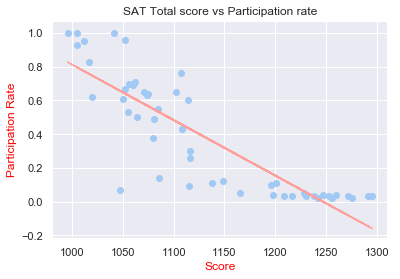

In [327]:
#Inverse corrleation between scores and participation rates
#This means that as participation rates lower, the scores are higher for SAT totals

plt.scatter(final['sat_total_17'], final['sat_part_17']);
plt.title('SAT Total score vs Participation rate')
plt.xlabel('Score', color='red')
plt.ylabel('Participation Rate',color='red' )

z = np.polyfit(final['sat_total_17'], final['sat_part_17'],1)
p = np.poly1d(z)
plt.plot(final['sat_total_17'],p(final['sat_total_17']),"r--" )

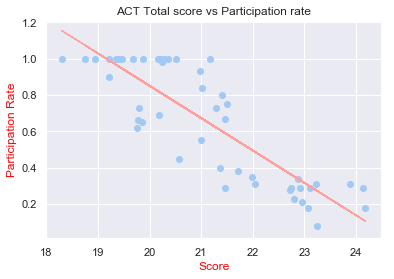

In [328]:
#Created ACT total average score and plotted against participation rate

for x in range (0,50):
    atotal = (final['act_eng_17'][x] + final['act_math_17'] +	final['act_read_17']+	final['act_sci_17']+	final['act_comp_17']) / 5 

    
plt.scatter(atotal, final['act_part_17']);
plt.title('ACT Total score vs Participation rate')
plt.xlabel('Score', color='red')
plt.ylabel('Participation Rate',color='red' )

z = np.polyfit(atotal, final['act_part_17'],1)
p = np.poly1d(z)
plt.plot(atotal, p(atotal),"r--" )
    

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

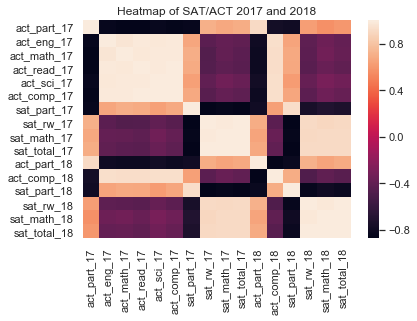

In [329]:
sns.heatmap(final.corr())
plt.title('Heatmap of SAT/ACT 2017 and 2018');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [330]:
# I can't get this function to work, it won't take any arguements and returns errors. 

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

SyntaxError: invalid syntax (<ipython-input-330-d37c2e5db636>, line 5)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

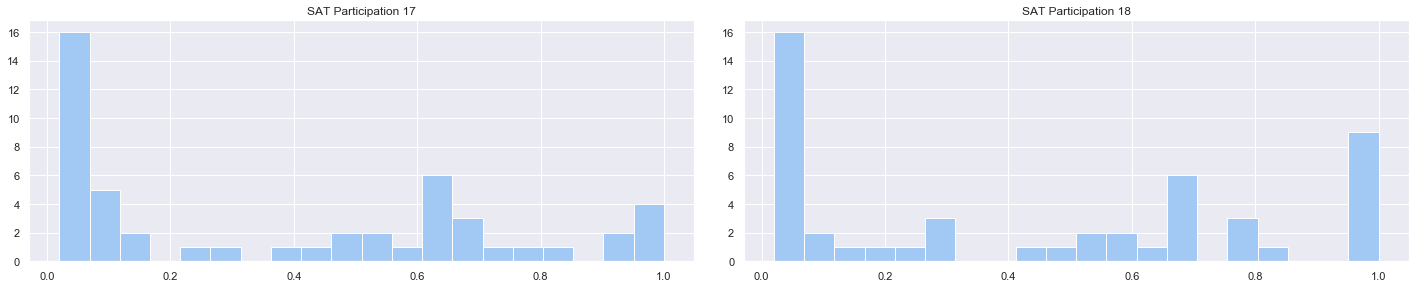

In [331]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,4));
fig.tight_layout(); 
plt.subplot(1,2,1) 
plt.hist(final['sat_part_17'], bins =20);
plt.title('SAT Participation 17');
plt.subplot(1,2,2)
plt.hist(final['sat_part_18'], bins =20);
plt.title('SAT Participation 18');

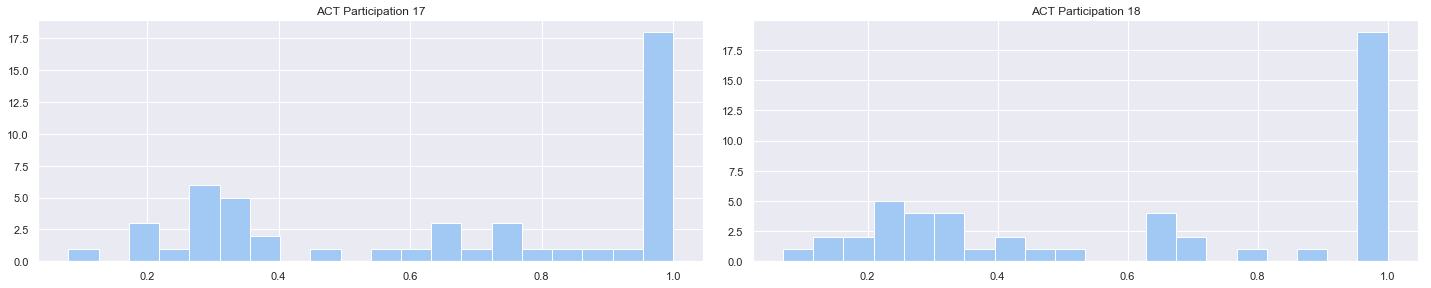

In [332]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,4));
fig.tight_layout(); 
plt.subplot(1,2,1) 
plt.hist(final['act_part_17'], bins =20);
plt.title('ACT Participation 17');
plt.subplot(1,2,2)
plt.hist(final['act_part_18'], bins =20);
plt.title('ACT Participation 18');

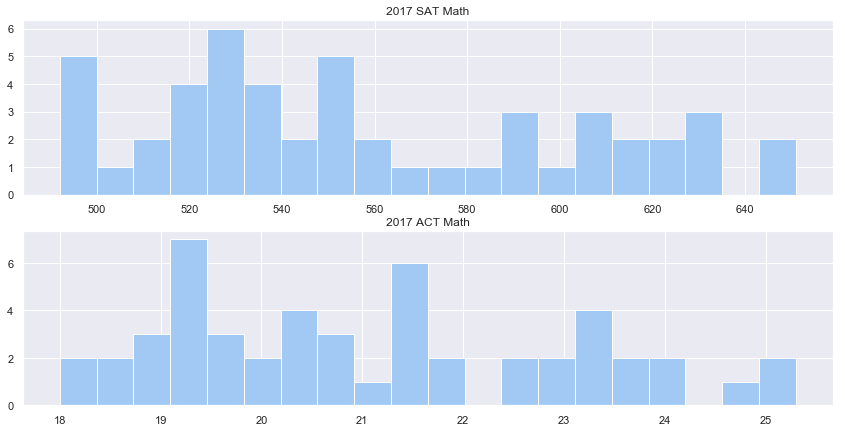

In [333]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,6) );
fig.tight_layout() 
plt.subplot(2,1,1)
plt.title('2017 SAT Math');
plt.hist(final['sat_math_17'],bins =20)
plt.subplot(2,1,2)
plt.title('2017 ACT Math');
plt.hist(final['act_math_17'],bins =20);
#Note, there seems to be some inversion in scores. It's likely that scoring differences may go beyond paricipation rates.

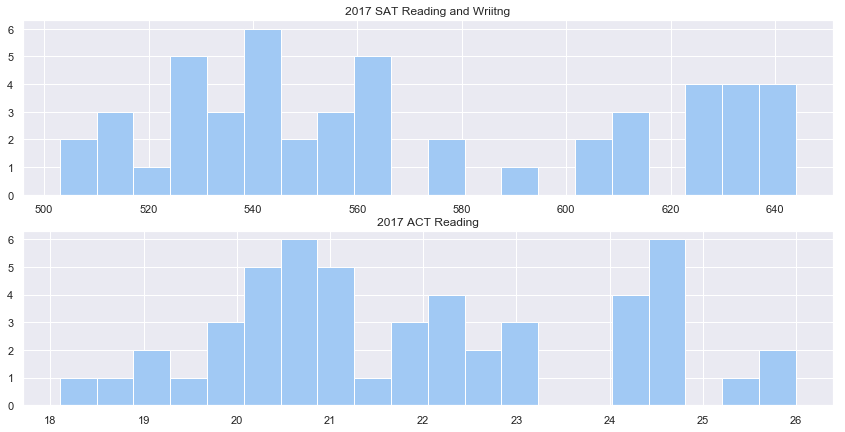

In [334]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6));
fig.tight_layout() 
plt.subplot(2,1,1)
plt.title('2017 SAT Reading and Wriitng');
plt.hist(final['sat_rw_17'],bins =20)
plt.subplot(2,1,2)
plt.title('2017 ACT Reading');
plt.hist(final['act_read_17'],bins =20);


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [335]:
final

,state,act_part_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17,sat_part_17,sat_rw_17,sat_math_17,sat_total_17,act_part_18,act_comp_18,sat_part_18,sat_rw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1168
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,0.28,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1054
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1015
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064


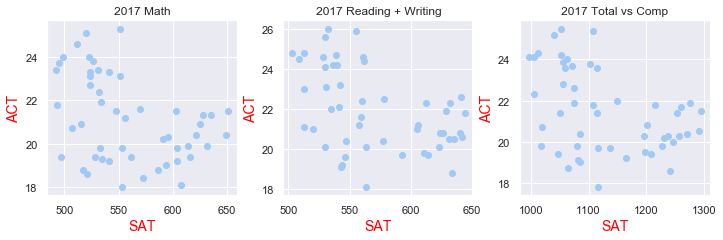

In [336]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,6));
fig.tight_layout() 
plt.subplot(2,3,1)
plt.title('2017 Math');
plt.xlabel('SAT',size=14, color='red');
plt.ylabel('ACT', size=14,color='red');
plt.scatter(final['sat_math_17'], final['act_math_17']);


plt.subplot(2,3,2)
plt.title('2017 Reading + Writing');
plt.scatter(final['sat_rw_17'], final['act_read_17']);
plt.xlabel('SAT',size=14, color='red');
plt.ylabel('ACT', size=14,color='red');

plt.subplot(2,3,3)
plt.title('2017 Total vs Comp');
plt.scatter(final['sat_total_17'], final['act_comp_17']);
plt.xlabel('SAT', size=14, color='red');
plt.ylabel('ACT', size=14,color='red');

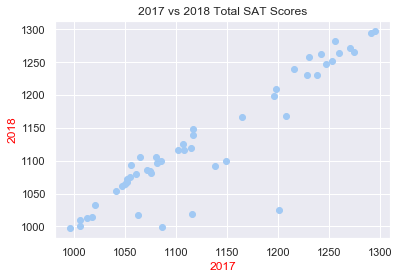

In [337]:
plt.title('2017 vs 2018 Total SAT Scores');
plt.scatter(final['sat_total_17'], final['sat_total_18']);
plt.xlabel('2017', size=12, color='red');
plt.ylabel('2018', size=12, color='red');
#Shows a generally strong relationship with several outliers positively correlated

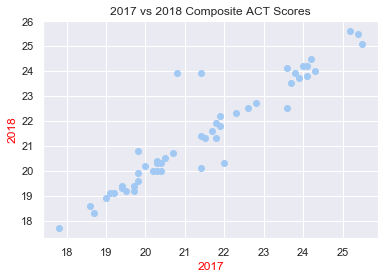

In [338]:
plt.title('2017 vs 2018 Composite ACT Scores');
plt.scatter(final['act_comp_17'], final['act_comp_18']);
plt.xlabel('2017', size=12, color='red');
plt.ylabel('2018', size=12, color='red');
#Shows a generally strong relationship mostly positively correlated

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'ACT Participation ')

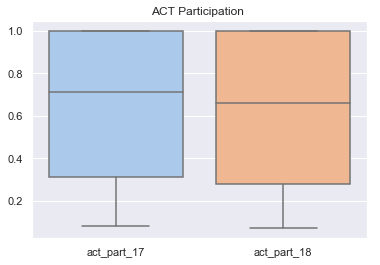

In [339]:
sns.set( palette='pastel')
boxpart= ['act_part_17' , 'act_part_18']
sns.boxplot( data=final[boxpart]);
plt.title('ACT Participation ')

Text(0.5, 1.0, 'SAT Participation ')

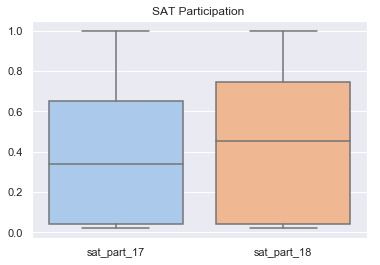

In [340]:
sns.set(palette='pastel')
boxpart= ['sat_part_17' , 'sat_part_18']
sns.boxplot( data=final[boxpart]);
plt.title('SAT Participation ')

Text(0.5, 1.0, 'SAT Reading and Writing')

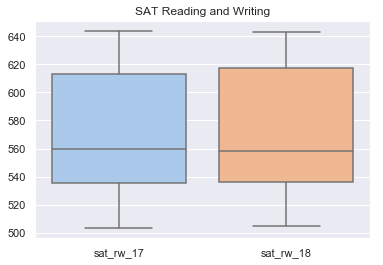

In [341]:
sns.set(palette='pastel')
boxpart= ['sat_rw_17' , 'sat_rw_18']
sns.boxplot( data=final[boxpart]);
plt.title('SAT Reading and Writing')

Text(0.5, 1.0, 'SAT Scores')

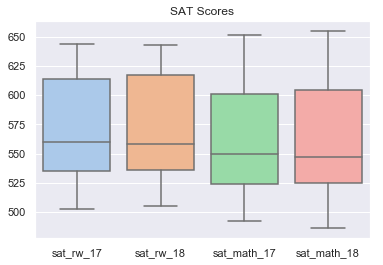

In [342]:
sns.set(palette='pastel')
fig.tight_layout() 
boxpart= ['sat_rw_17',	'sat_rw_18',	'sat_math_17',	'sat_math_18']
sns.boxplot( data=final[boxpart]);
plt.title('SAT Scores')
#Math scores tended to be lower on average than reading and writing on SATs. However still improved in 2018

Text(0.5, 1.0, 'ACT Data')

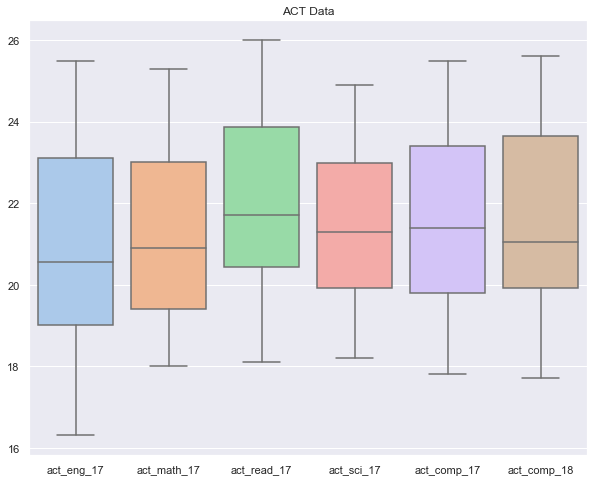

In [343]:
sns.set(palette='pastel')
fig.tight_layout() 
boxpart= ['act_eng_17',	'act_math_17',	'act_read_17',	'act_sci_17',	'act_comp_17', 'act_comp_18']
plt.figure(figsize=(10,8))
sns.boxplot( data=final[boxpart]);

plt.title('ACT Data')
#Reading and writing have slightly higher scores in math and writing

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## 2017 maps of participation rates for ACT and SAT
[Participation of ACT ](https://public.tableau.com/profile/eric4391#!/vizhome/Book1_36952/Sheet1?)

[Participation of SAT](publish=yeshttps://public.tableau.com/profile/eric4391#!/vizhome/Book2_22839/Sheet1?publish=yes)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: For paricipation we see a general strong trend to have a very large standard deviation. as the participation across tests and years is extremely wide from state to state. Within each test their scores tend to have stable means and averages and if yearly data was availble, it tended to lie within that mean as well.From the data we observe that math scores tended to be lower within each test type inlcuding 2017 and 2018. Generally reading and writing or compositions scores were greater spreads but also higher averages. 

In [344]:
final.describe()

,act_part_17,act_eng_17,act_math_17,act_read_17,act_sci_17,act_comp_17,sat_part_17,sat_rw_17,sat_math_17,sat_total_17,act_part_18,act_comp_18,sat_part_18,sat_rw_18,sat_math_18,sat_total_18
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.659200,20.862000,21.13600,21.956000,21.412000,21.466000,0.386000,570.860000,558.660000,1129.620000,0.623200,21.454000,0.443000,569.120000,560.020000,1129.140000
std,0.321107,2.324307,1.97399,2.046317,1.734128,2.004241,0.345602,44.385146,45.839832,89.913085,0.341141,2.111312,0.370704,44.619772,48.668177,92.944137
min,0.080000,16.300000,18.00000,18.100000,18.200000,17.800000,0.020000,503.000000,492.000000,996.000000,0.070000,17.700000,0.020000,505.000000,486.000000,997.000000
25%,0.310000,19.000000,19.40000,20.425000,19.925000,19.800000,0.040000,535.250000,524.000000,1057.000000,0.277500,19.925000,0.042500,536.250000,525.000000,1065.000000
50%,0.710000,20.550000,20.90000,21.700000,21.300000,21.400000,0.340000,559.500000,549.500000,1107.500000,0.660000,21.050000,0.455000,558.000000,547.000000,1102.500000
75%,1.000000,23.100000,23.00000,23.875000,22.975000,23.400000,0.650000,613.500000,601.000000,1214.000000,1.000000,23.650000,0.745000,617.250000,604.000000,1225.000000
max,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In [345]:
# I would believe we need to be cautious when assuming a normal distribution with state scores because states are bins of varying population 
#but not weighted by population size. Despite this we would expect to see from the data a normal distribution. As shown above. 

#Also, from boxplots we know that much of the scores are right leaning (postively skewed). 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


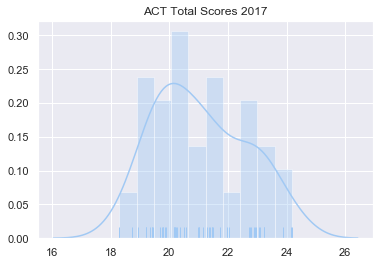

In [346]:
plt.title('ACT Total Scores 2017');
sns.distplot(atotal, bins=10, kde=True, rug=True);
#Nomral Distribution, slightly bimodal

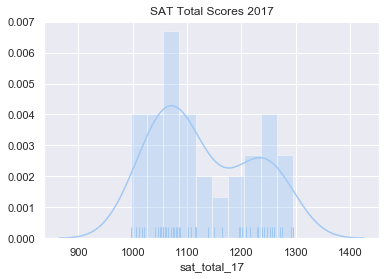

In [347]:
plt.title('SAT Total Scores 2017');
sns.distplot(final['sat_total_17'], bins=10, kde=True, rug=True);
#Bimodal right leaning

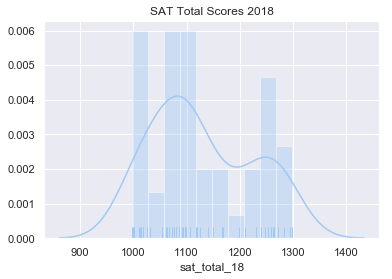

In [348]:
plt.title('SAT Total Scores 2018');
sns.distplot(final['sat_total_18'], bins=10, kde=True, rug=True);
#Bimodal right leaning

Answer: Many of the scores are right leaning positvely skewed. When taking the averages of 2017 ACT scores we see something closer to a normal distribution. Again I would emphasize that due to the fact that we are comparing averages by state and not by population the bins have altered and skewed. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: It looks like the data tends to be more right leaning with more data points lying on lower scores with more outliers bringing the score mean average up. Is looks like we could gather it is normally distributed but could potentially need more data points to determine that. Since our bin is the use of state averages instead of individual averages if we used binned by indiviudal we may see a more normally distributed graph. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Since the particiaption rate is inversely related we can assume for the most part that if they are using one test they will not focus on the other, but not necessarily true that that they are mutually exclusive as states have both mandatory or optional. For the most part we can conclude due to the inverse nature that it might be likely that states or students (depending on which level the decision making occurs) to focus only on one test. Due to the variability of state to state this would seem likely to be happening at the state level due to the high Standard Deviation and spread. It would seem unlikely that individual people in one state would all choose the same test by chance. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: For this project we did not compare them side by side in a way that conveyed their weighted meaning and scores. Since they scores could be weighted differently and scaled differently it could be possible to compare them side to side if we found some weighted meaningful coefficent between the two. However, due to the scope of the project (and time limit) we were unable to do so. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [349]:
# Code:
final.to_csv('final.csv')

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

MA had a 2018 SAT participation of 80% and an ACT participation rate of 25%. MA had an overlap of 5% taking both.
Not only does the statisic reveal that either test was optional but that the SAT was generally more popular in MA. 
But did not require one
Alabama has 100% participation rate in ACT. But did have about 5% of their students take an optional SAT. Top 3
Sates with the highest participation are

8. Florida 156%

39. South Carolina 150%

32. Nort Carolina 149%

In [350]:
totalpart = final['act_part_17'] + final['sat_part_17']
totalpart.sort_values(ascending=False).head(3)

8     1.56
39    1.50
32    1.49
dtype: float64

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

For recommendations, one common trend is the math and science scores on a strict point scale tend to be lower than other disciplines. This might be because of the often commented criticism on how America is behind in the maths and sciences, but could also be possible how the tests are scored and weighted. If so in order to keep the scores normalized it could be beneficial to ease the dificulty. Also the spread of ranges for most of the tests contain averages with some states much higher than others. 

Lastly, more investigation into states where the test is looks to be optional (participation rate of 5%). These have the highest scores. Likely due to the fact that optional testing is often undertaken by students who do well on tests.

I do not believe there is enough data to make a recommendation on how the College Baord can increase participation rates based solely on participation %, scores and states. We would require more additional data including more survey data behind the decision making process for some students to take a test if it's optional or why some states require one test over the other. 